In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load data from a pickle file
df = pd.read_pickle('date_formatted_df.pkl')

In [3]:
#load data from a pickle file
turnstile_df = pd.read_pickle('turnstile_df.pkl')

In [4]:
#load data from a pickle file
date_df = pd.read_pickle('date_df.pkl')

In [5]:
#load data from a pickle file
station_df = pd.read_pickle('station_df.pkl')

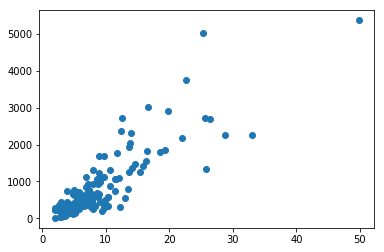

In [6]:
#create scatter plot of number of turnstile in station against that stations passengers per hour rate
plt.scatter(station_df['num_turnstiles'], station_df['passengers_per_hour']);

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


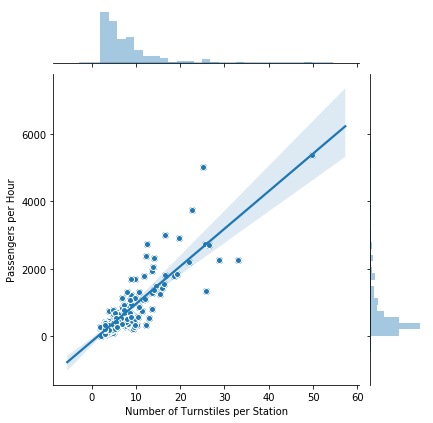

In [7]:
#create scatter plot with simpler regression of number of turnstile in station 
#against that stations passengers per hour rate

ax = sns.jointplot(x = 'num_turnstiles',  y = 'passengers_per_hour', 
                   data = station_df[station_df['passengers_per_hour'] != np.inf], kind = 'scatter')
ax.set_axis_labels('Number of Turnstiles per Station', 'Passengers per Hour')
ax.plot(sns.regplot, sns.distplot);
ax.plot_joint(plt.scatter, edgecolor = "white");
plt.savefig("StationTurnstileVsPassengerRate.png")

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


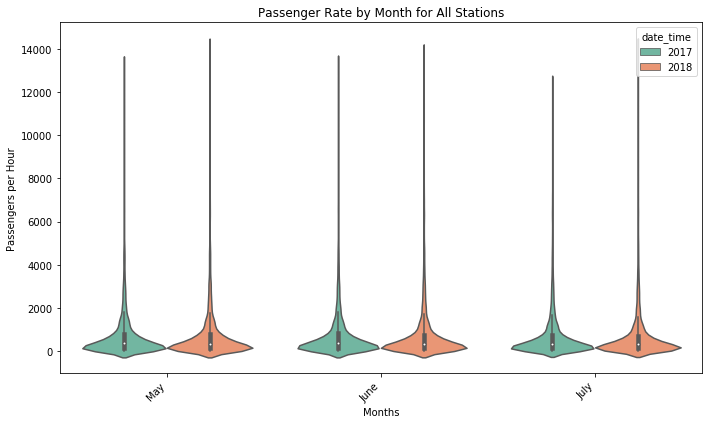

In [8]:
#Violin graph of Passenger Rate by Month for All Stations

plt.figure(figsize = (10, 6))

ax = sns.violinplot(x = date_df['date_time'].dt.month, y = 'passengers_per_hour', 
                    data = date_df, hue = date_df['date_time'].dt.year, palette = 'Set2')
ax.set_title('Passenger Rate by Month for All Stations')
ax.set_xlabel('Months')
ax.set_ylabel('Passengers per Hour')
ax.set_xticklabels(['May', 'June', 'July'],
                   rotation = 45, ha = "right")
# ax.legend(['2017', '2018'])

plt.tight_layout()
plt.savefig("PassengerRatebyMonth.png")

In [9]:
#create a priority station list for future graphs

priority_station_list = ['ST-HERALD SQ', '28 ST', '23 ST',
                     '14 ST-UNION SQ', 'DEKALB AVE',
                     'YORK ST', '33 ST', 'JAY ST-METROTEC',
                     'COURT SQ-23 ST', 'ATLANTIC AV', '14 ST',
                     '42 ST-BRYANT PK', 'DELANCEY/ESSEX',
                     'GRAND ST', 'BROADWAY JCT', '2 AV',
                     'BOWERY', 'CANAL ST', 'BLEECKER ST']

In [10]:
#create a date frame of priority stations
date_df['priority_station'] = date_df['station'].isin(priority_station_list)

In [11]:
#find priority stations location in date dataframe
date_df.loc[date_df['priority_station'] == True, 'priority_station'] = 'Yes'

In [12]:
#find none priority station location in date dateframe
date_df.loc[date_df['priority_station'] == False, 'priority_station'] = 'No'

In [13]:
#graph passenger rate for top 3 priority stations
top_3_priority_df = date_df[(date_df['station'] == '14 ST') | (date_df['station'] == '14 ST-UNION SQ') | (date_df['station'] == '23 ST')]

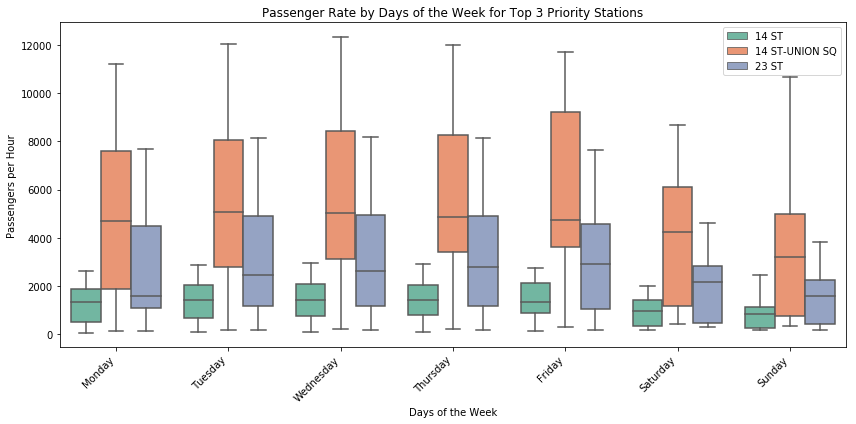

In [14]:
#Examine Passenger Rate by Day of Week for Top 3 Priority Stations

plt.figure(figsize = (12, 6))

ax = sns.boxplot(x = date_df['date_time'].dt.weekday, y = 'passengers_per_hour', 
                    data = top_3_priority_df, hue = top_3_priority_df['station'], palette = 'Set2')
ax.set_title('Passenger Rate by Days of the Week for Top 3 Priority Stations')
ax.set_xlabel('Days of the Week')
ax.set_ylabel('Passengers per Hour')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday',
                    'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                   rotation = 45, ha = "right")

plt.legend(loc = "best")
plt.tight_layout()
plt.savefig("PassengerRatebyDayTopThreePriorityStations.png")

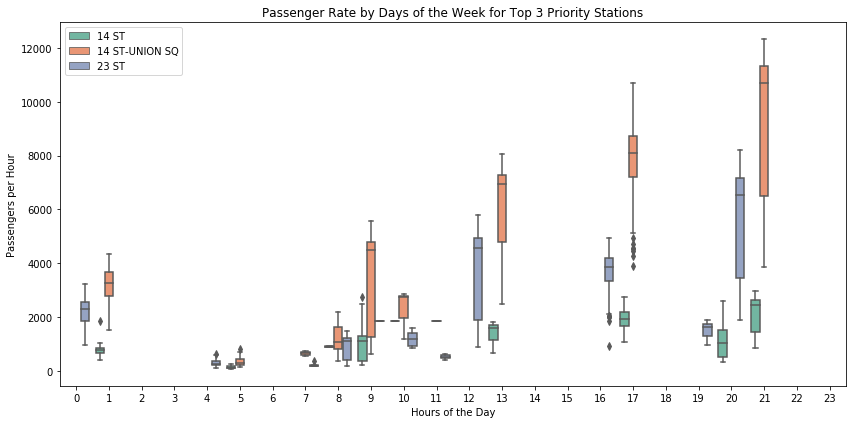

In [15]:
#create boxchart of Passenger Rate by hours for Top 3 Priority Stations

plt.figure(figsize = (12, 6))

ax = sns.boxplot(x = date_df['date_time'].dt.hour, y = 'passengers_per_hour', 
                    data = top_3_priority_df, hue = top_3_priority_df['station'], palette = 'Set2')
ax.set_title('Passenger Rate by Days of the Week for Top 3 Priority Stations')
ax.set_xlabel('Hours of the Day')
ax.set_ylabel('Passengers per Hour')
# ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday',
#                     'Thursday', 'Friday', 'Saturday', 'Sunday'], 
#                    rotation = 45, ha = "right")

plt.legend(loc = "best")
plt.tight_layout()
plt.savefig("PassengerRatebyHourTopThreePriorityStations.png")

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


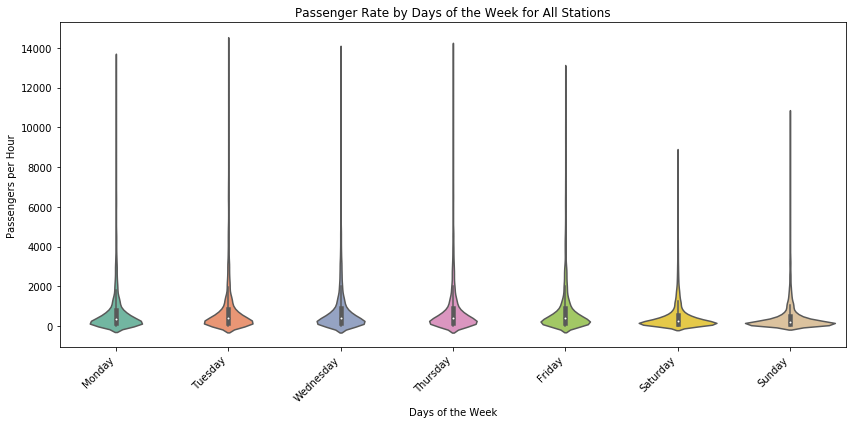

In [16]:
#create violin graph of Passenger Rate by Days of Week for Top 3 Priority Stations

plt.figure(figsize = (12, 6))

ax = sns.violinplot(x = date_df['date_time'].dt.weekday, y = 'passengers_per_hour', 
                    data = date_df, palette = 'Set2')
ax.set_title('Passenger Rate by Days of the Week for All Stations')
ax.set_xlabel('Days of the Week')
ax.set_ylabel('Passengers per Hour')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday',
                    'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                   rotation = 45, ha = "right")

plt.tight_layout()
plt.savefig("PassengerRatebyDayofWeekAllStations.png")

In [17]:
len(['ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', 'DEKALB AVE', 'YORK ST', '33 ST', 'JAY ST-METROTEC', 'COURT SQ-23 ST', 'ATLANTIC AV', '14 ST', '42 ST-BRYANT PK', 'DELANCEY/ESSEX', 'GRAND ST', 'BROADWAY JCT', '2 AV', 'BOWERY', 'CANAL ST', 'BLEECKER ST'])

19

In [18]:
priority_station_list = ['ST-HERALD SQ', '28 ST', '23 ST',
                     '14 ST-UNION SQ', 'DEKALB AVE',
                     'YORK ST', '33 ST', 'JAY ST-METROTEC',
                     'COURT SQ-23 ST', 'ATLANTIC AV', '14 ST',
                     '42 ST-BRYANT PK', 'DELANCEY/ESSEX',
                     'GRAND ST', 'BROADWAY JCT', '2 AV',
                     'BOWERY', 'CANAL ST', 'BLEECKER ST']

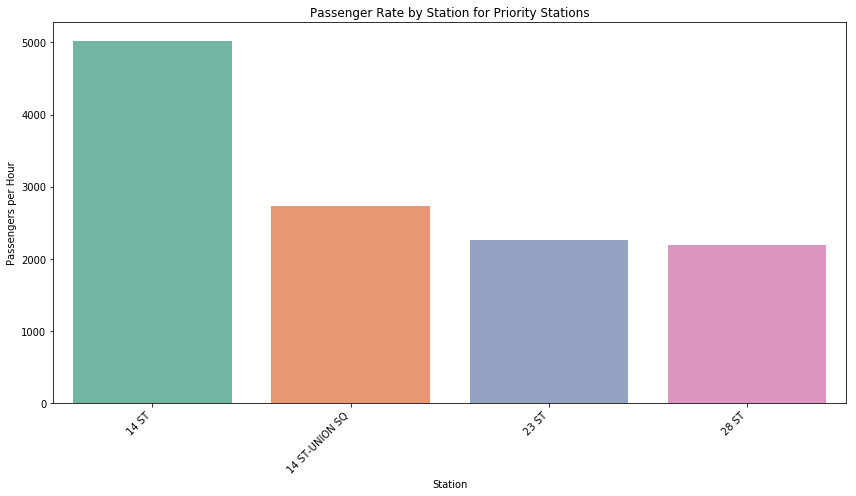

In [19]:
#Passenger Rate by Station for top priority stations
plt.figure(figsize = (12, 7))

ax = sns.barplot(x = 'station', y = 'passengers_per_hour',
                    data = station_df[station_df['station'].isin(priority_station_list)].sort_values(by = 'passengers_per_hour', ascending = False)[0:4], palette = 'Set2')
ax.set_title('Passenger Rate by Station for Priority Stations')
ax.set_xlabel('Station')
ax.set_ylabel('Passengers per Hour')
ax.set_xticklabels(station_df[station_df['station'].isin(priority_station_list)]['station'].unique(), 
                   rotation = 45, ha = "right")

plt.tight_layout()
plt.savefig("PriorityStationPassengerRate.png")

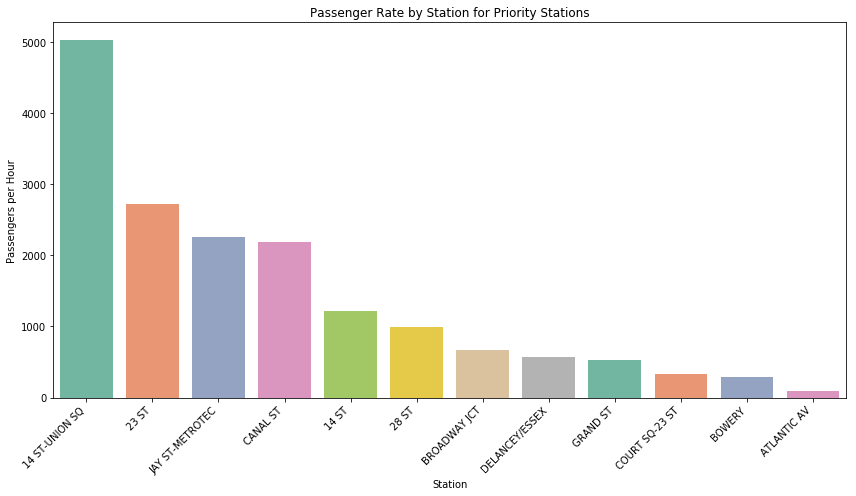

In [20]:
#passenger rate for all priority stations

plt.figure(figsize = (12, 7))

ax = sns.barplot(x = 'station', y = 'passengers_per_hour',
                    data = station_df[station_df['station'].isin(priority_station_list)].sort_values(by = 'passengers_per_hour', ascending = False), palette = 'Set2')
ax.set_title('Passenger Rate by Station for Priority Stations')
ax.set_xlabel('Station')
ax.set_ylabel('Passengers per Hour')
ax.set_xticklabels(station_df[station_df['station'].isin(priority_station_list)].sort_values(by = 'passengers_per_hour', ascending = False)['station'].unique(), 
                   rotation = 45, ha = "right")

plt.tight_layout()
plt.savefig("PassengerRatebyDayStationPriorityStations.png")

In [21]:
station_df.head()

,station,total_passengers,num_observations,date_time_count,station_hours,passengers_per_hour,num_turnstiles
0,1 AV,7391182.0,10727,1104,4385.411561,1685.402133,9.716486
1,103 ST,1485584.0,3242,1092,4351.403056,341.403446,2.968864
2,104 ST,591491.0,5656,1107,4457.275417,132.702367,5.109304
3,111 ST,1246868.0,9494,2152,8576.316833,145.385021,4.411710
4,116 ST,1599273.0,4966,1093,4348.625389,367.765180,4.543458


In [22]:
station_df['priority_station'] = station_df['station'].isin(priority_station_list)

In [23]:
station_df.loc[station_df['priority_station'] == True, 'priority_station'] = 'Yes'

In [24]:
station_df.loc[station_df['priority_station'] == False, 'priority_station'] = 'No'

In [25]:
station_df['priority_station'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
station_df.head()

,station,total_passengers,num_observations,date_time_count,station_hours,passengers_per_hour,num_turnstiles,priority_station
0,1 AV,7391182.0,10727,1104,4385.411561,1685.402133,9.716486,No
1,103 ST,1485584.0,3242,1092,4351.403056,341.403446,2.968864,No
2,104 ST,591491.0,5656,1107,4457.275417,132.702367,5.109304,No
3,111 ST,1246868.0,9494,2152,8576.316833,145.385021,4.411710,No
4,116 ST,1599273.0,4966,1093,4348.625389,367.765180,4.543458,No


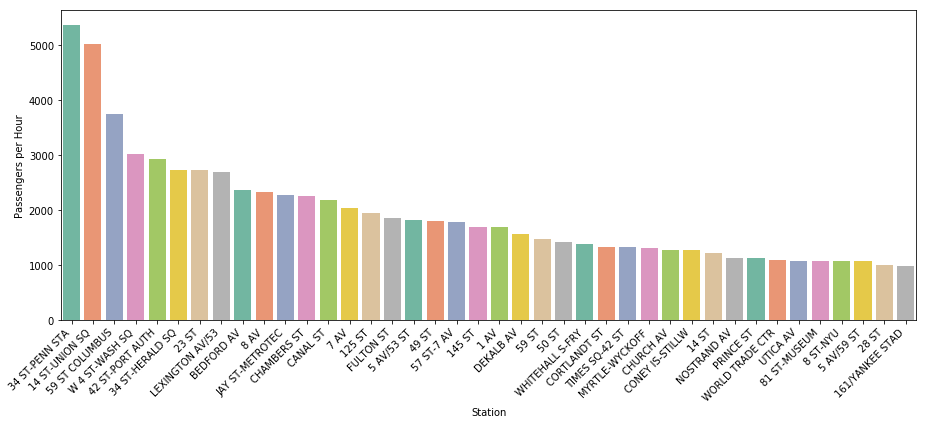

In [27]:
#passenger rate for all stations
plt.figure(figsize = (13, 6))

ax = sns.barplot(x = 'station', y = 'passengers_per_hour',
                 data = station_df.sort_values(by = 'passengers_per_hour', ascending = False)[0:40], palette = 'Set2')
ax.set_xlabel('Station')
ax.set_ylabel('Passengers per Hour')
ax.set_xticklabels(station_df.sort_values(by = 'passengers_per_hour', ascending = False)[0:40]['station'], 
                   rotation = 45, ha = "right")

plt.tight_layout()
plt.savefig("PassengerRateForAllStations.png")

In [28]:
station_df.sort_values(by = 'passengers_per_hour', ascending = False)[0:40]

,station,total_passengers,num_observations,date_time_count,station_hours,passengers_per_hour,num_turnstiles,priority_station
30,34 ST-PENN STA,23993322.0,56298,1130,4466.119700,5372.297119,49.821239,No
9,14 ST-UNION SQ,22307628.0,28254,1119,4438.352289,5026.105759,25.249330,Yes
43,59 ST COLUMBUS,16599885.0,25086,1109,4421.805408,3754.096680,22.620379,No
181,W 4 ST-WASH SQ,13365260.0,18435,1110,4434.574056,3013.876830,16.608108,No
32,42 ST-PORT AUTH,26004555.0,44800,2266,8894.290490,2923.735741,19.770521,No
29,34 ST-HERALD SQ,12097878.0,14105,1117,4432.326322,2729.464647,12.627574,No
24,23 ST,12146099.0,28775,1121,4457.192391,2725.056030,25.669045,Yes
140,LEXINGTON AV/53,12039511.0,29425,1114,4467.318765,2695.019458,26.413824,No
81,BEDFORD AV,10230968.0,13499,1089,4316.618803,2370.134697,12.395776,No
51,8 AV,10459805.0,16174,1155,4497.341516,2325.775119,14.003463,No


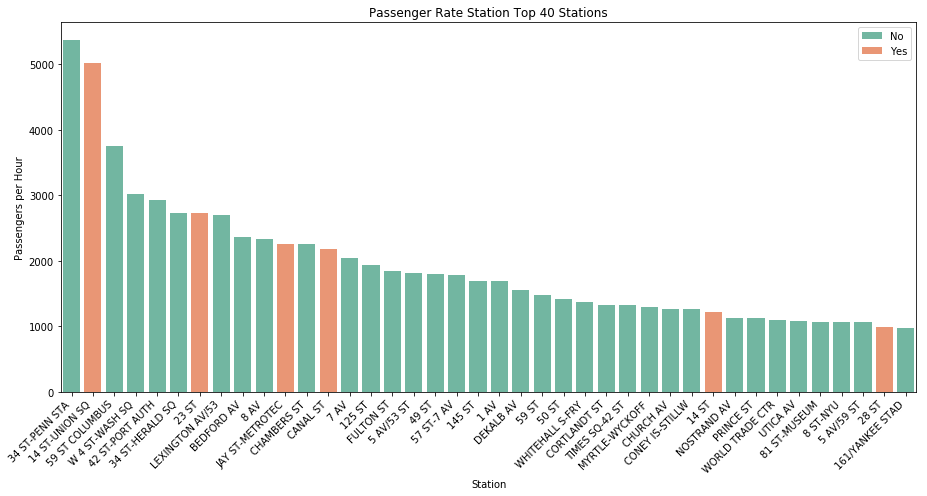

In [29]:
#passenger rate for top 40 station agaisnt priority stations
plt.figure(figsize = (13, 7))

ax = sns.barplot(x = 'station', y = 'passengers_per_hour',
                 data = station_df.sort_values(by = 'passengers_per_hour', ascending = False)[0:40],
                 hue = 'priority_station', dodge = False, palette = 'Set2')
ax.set_title('Passenger Rate Station Top 40 Stations')
ax.set_xlabel('Station')
ax.set_ylabel('Passengers per Hour')
ax.set_xticklabels(station_df.sort_values(by = 'passengers_per_hour', ascending = False)[0:40]['station'],
                   rotation = 45, ha = "right")
plt.legend(loc = "best")
plt.tight_layout()
plt.savefig("PassengerRatePriorityVsOther.png")